# Rule based sentiment analysis for movie review data set

## laoding our dataframe for analysis
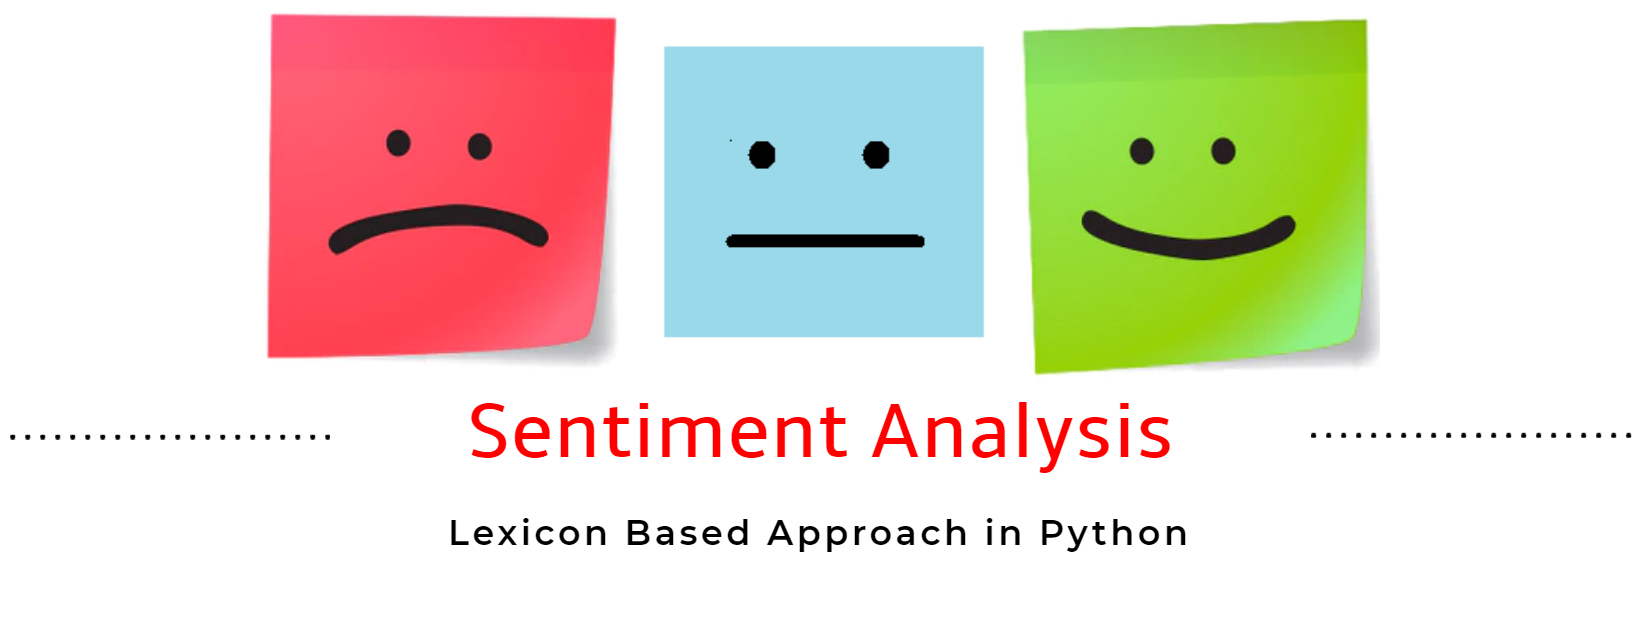

#### Intro:
According to experts, 80% of the world’s existing data is in the form of unstructured data(images, videos, text, etc). This data could be generated by Social media tweets/posts, call transcripts, survey or interview reviews, text across blogs, forums, news, etc.

It is humanly impossible to read all the text across the web and find patterns. Yet, there is definitely a need for the business to analyze this data for better actions.

One such process of drawing insights from textual data is Sentiment Analysis. To obtain the data for sentiment analysis, one can directly scrape the content from the web pages using different web scraping techniques.

#### What is Sentiment Analysis?
Sentiment Analysis (also known as opinion mining or emotion AI) is a sub-field of NLP that measures the inclination of people’s opinions (Positive/Negative/Neutral) within the unstructured text.

Sentiment Analysis can be performed using two approaches: Rule-based, Machine Learning based.

Few applications of Sentiment Analysis
Market analysis
Social media monitoring
Customer feedback analysis – Brand sentiment or reputation analysis
Market research
What is Natural Language Processing(NLP)?
Natural Language is the way we, humans, communicate with each other. It could be Speech or Text. NLP is the automatic manipulation of the natural language by software. NLP is a higher-level term and is the combination of Natural Language Understanding (NLU) and Natural Language Generation  (NLG).

NLP = NLU + NLG

Some of the Python Natural Language Processing (NLP) libraries are:

Natural Language Toolkit (NLTK)
TextBlob
SpaCy
Gensim
CoreNLP
I hope we have got a basic understanding of the terms Sentiment Analysis, NLP.

This article focusses on the Rule-based approach of Sentiment Analysis

#### Rule-based approach
This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text
Tokenization
Enrichment – POS tagging
Stopwords removal
Obtaining the stem words
Before deep-diving into the above steps, lemme import the text data from a txt file.

In [122]:
# install and import pandas library
import pandas as pd
import os
path = "C:/Users/Sushanth S/Class Lectures/Module-2/Lecture-5/NLP_Project"
os.chdir(path)
# Creating a pandas dataframe from reviews.txt file
mydata = pd.read_excel("final_data.xls")
mydata.head()

,review
0,Once again Mr. Costner has dragged out a movie...
1,Story of a man who has unnatural feelings for ...
2,Bromwell High is a cartoon comedy. It ran at t...
3,OK its not the best film I've ever seen but at...
4,I was looking forward to this movie. Trustwort...


## Step 1: Cleaning the text
In this step, we need to remove the special characters, numbers from the text. We can use the regular expression operations library of Python.

In [123]:
# Define a function to clean the text
## Impporting re for removing the charecters and other notation in the file
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['review'].apply(clean)
mydata.head()

,review,Cleaned Reviews
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...


## Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

I will be performing word-level tokenization using nltk tokenize function word_tokenize().

Note: As our text data is a little large, first I will illustrate steps 2-5 with small example sentences.

Let’s say we have a sentence “This is an article on Sentiment Analysis“. It can be broken down into small pieces(tokens) as shown below.

In [125]:
# Importing all the libraries required for the above process
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [126]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [127]:
mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

,review,Cleaned Reviews,POS tagged
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[(Mr, n), (Costner, n), (dragged, v), (movie, ..."
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[(Story, n), (man, n), (unnatural, a), (feelin..."
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[(Bromwell, n), (High, n), (cartoon, n), (come..."
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[(OK, None), (best, a), (film, n), (ever, r), ..."
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[(looking, v), (forward, r), (movie, n), (Trus..."


## Step 5: Obtaining the stem words – Lemmatization

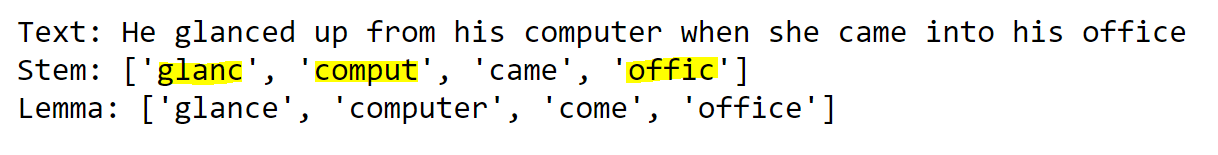

In [128]:
## creating a function for word lemantation : 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [129]:
mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,review,Cleaned Reviews,POS tagged,Lemma
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[(Mr, n), (Costner, n), (dragged, v), (movie, ...",Mr Costner drag movie far long necessary Asi...
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[(Story, n), (man, n), (unnatural, a), (feelin...",Story man unnatural feeling pig Starts openi...
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[(Bromwell, n), (High, n), (cartoon, n), (come...",Bromwell High cartoon comedy run time progra...
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[(OK, None), (best, a), (film, n), (ever, r), ...",OK best film ever see time able sit watch TW...
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[(looking, v), (forward, r), (movie, n), (Trus...",look forward movie Trustworthy actor interes...


In [130]:
mydata[['review','Lemma']]

,review,Lemma
0,Once again Mr. Costner has dragged out a movie...,Mr Costner drag movie far long necessary Asi...
1,Story of a man who has unnatural feelings for ...,Story man unnatural feeling pig Starts openi...
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High cartoon comedy run time progra...
3,OK its not the best film I've ever seen but at...,OK best film ever see time able sit watch TW...
4,I was looking forward to this movie. Trustwort...,look forward movie Trustworthy actor interes...
...,...,...
1023,Four things intrigued me as to this film - fir...,Four thing intrigue film firstly star Carly ...
1024,A Christmas Together actually came before my t...,Christmas Together actually come time raise ...
1025,"This is one of the dumbest films, I've ever se...",one dumb film ever see rip nearly ever type ...
1026,David Bryce's comments nearby are exceptionall...,David Bryce comment nearby exceptionally wel...


## Sentiment Analysis using TextBlob:

#### TextBlob is a Python library for processing text data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

The two measures that are used to analyze the sentiment are:

Polarity – talks about how positive or negative the opinion is
Subjectivity – talks about how subjective the opinion is
TextBlob(text).sentiment gives us the Polarity, Subjectivity values.
Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [131]:
# for example:
from textblob import TextBlob
res = TextBlob("horror films are dashing good").sentiment
res

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [132]:
#create functions to obtain Polarity, Subjectivity values and to Label the review based on the Polarity score.

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [133]:
# Create new dataframe with final outputs tagged
fin_data = pd.DataFrame(mydata[['review', 'Lemma']])

In [134]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis
0,Once again Mr. Costner has dragged out a movie...,Mr Costner drag movie far long necessary Asi...,0.118519,Positive
1,Story of a man who has unnatural feelings for ...,Story man unnatural feeling pig Starts openi...,-0.056481,Negative
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High cartoon comedy run time progra...,0.128274,Positive
3,OK its not the best film I've ever seen but at...,OK best film ever see time able sit watch TW...,0.124074,Positive
4,I was looking forward to this movie. Trustwort...,look forward movie Trustworthy actor interes...,0.134868,Positive


### Count the number of positive, negative, neutral reviews.

In [135]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    659
Negative    367
Neutral       2
Name: Analysis, dtype: int64

## Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [136]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [137]:
res = analyzer.polarity_scores("horror films are dashing good")
res

{'neg': 0.385, 'neu': 0.312, 'pos': 0.302, 'compound': -0.2023}

In [138]:
mydata1 = mydata

In [139]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
mydata1['Vader Sentiment'] = mydata1['Lemma'].apply(vadersentimentanalysis)

mydata1['Vader Analysis'] = mydata1['Vader Sentiment'].apply(vader_analysis)

mydata1.head()

,review,Cleaned Reviews,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[(Mr, n), (Costner, n), (dragged, v), (movie, ...",Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[(Story, n), (man, n), (unnatural, a), (feelin...",Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[(Bromwell, n), (High, n), (cartoon, n), (come...",Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[(OK, None), (best, a), (film, n), (ever, r), ...",OK best film ever see time able sit watch TW...,0.9222,Positive
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[(looking, v), (forward, r), (movie, n), (Trus...",look forward movie Trustworthy actor interes...,0.9353,Positive


### Count the number of positive, negative, neutral reviews.

In [140]:
vader_counts = mydata1['Vader Analysis'].value_counts()
vader_counts

Positive    513
Negative    364
Neutral     151
Name: Vader Analysis, dtype: int64

### The results of Vander sentiment analysis seems to be better in comparison to Textblob

## Saving the data into a new datafram excel

In [141]:
# determining the name of the file
file_name = 'Labelled_data.xlsx'
  
# saving the excel
mydata1.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
